# Interpolación y ajuste de curvas

## Introducción

Durante los procesos de ingeniería es común obtener valores de datos, estos datos usualmente son discretos, quizás usted requiera la estimación de un putno entre valores discretos, o quizás tiene una función muy compleja, existen metodologías donde se pueden obtener valores discretos de la función compleja dentro de un intervalo de interés y después se obtiene una función más simple para ajustar dichos valores. Estas dos aplicaciones se conocen como ajuste de curvas. 

Si los datos exhiben un grado significativo de errror o *ruido*, la estrageia será obtener una sola curva que representa la tendencia general de datos. Como cualquier otro dato individual puede ser incorrecto, no se busca entersecar todos los puntos, en lugar de esto, se construye una curva que siga la tendencia de los puntos tomados como un grupo. Un procedimiento de este tipo se le llama *regresión por mínimos cuadrados*.

Otro enfoque, consiste en que los datos que se obtienen son muy preciso, en este enfoque el objetivo es obtener una función o una serie de curvas que pasen por cada uno de los punto de forma directa. Usualmente estos datos se obtienen de datos.

De forma general se tienen dos tipos de aplicaciones de ajuste de datos experimentales: *análisis de tendencia* y *prueba de hipótesis*. El análisis de la tendencia sirve para predecir o pronosticar valores de la variable dependiente (Predicción). mientra que la prueba de hipótesis, requiere un modelo matemático existente que se compara con los datos obtenidos. Si se desconocen los coeficinetes del model, será necesario determinar los valores que me se ajusten a los datos observados (IDENTIFICACIÓN PARAMÉTRICA)

## Interpolación de primer orden
 Dentro de la igeniería, mucha de l ainformación que se ha obtenido de forma experimental (como coeficientes de fricción, presión, temperatura,  entre otros) están presentados en tablas y estas tablas contienen sólo datos específicos que usualmente no coinciden con los datos de nuestrso experimentos o diseños, sin embargo, con la información presentada en las tablas se pueden obtener valores intermedios dependiendo de las necesidades de diseño.
 
 Suponga que obtiene una tabla como la que se muestra a continuación  que muestra una relación de temperatura y presión de algún líquido. 


| Puntos | 0  |  1  |  2  |  3  |
|--------|----|-----|-----|-----|
| T\[c\] |56.5| 113 |181.0|214.5|
|P\[atm\]|  1 |  5  | 20  | 40  |

 Ahora suponga que quiere calcular la temperatura cuando se tiene una presión de $10 atm$ observe que en la tabla no está el valor de $10$, consecuentemente es necesario hacer un procedimiento de interpolación, que consiste en sustituir los puntos $P_1$ y  y $P_2 $  en la ecuación de un polinomio de primer orden y después se obtiene un sistema de ecuaciones con dos incógnitas. La ecuación del polinomio de primer orden está dado por
 
  \begin{equation}
 \label{first_order_pol}
 \hat y = a_0 + a_1x
 \end{equation}
 
 
 Sustituyendo los puntos $P_1 = (5,113)$ y $P_2= (20,181)$ en \eqref{first_order_pol} se otbienen el siguiente sistema de ecuaciones
 \begin{eqnarray}
 113  & = a_0 + 5a_1\\
 181  & = a_0 + 20a_1  
 \end{eqnarray} 
  Cuya forma matricial está dada por 
 \begin{equation}
 \begin{bmatrix} 1 & 5 \\ 1 & 20\end{bmatrix}\begin{bmatrix}a_0 \\ a_1 \end{bmatrix} = \begin{bmatrix} 113 \\ 181 \end{bmatrix}
\end{equation} 

La solución del sistema de ecuaciones estaría dada por 
\begin{equation}
\label{solution_01}
\begin{aligned}
a_0 & = 90.33\\
a_1 & = 4.53
\end{aligned}
\end{equation}

Sustituyendo \eqref{solution_01} en \eqref{first_order_pol} se obtiene la siguiente ecuación 

\begin{equation}
\label{polinomio_01}
y = 90.33 + 4.53 x
\end{equation}

Una vez que se tiene el polinomio, se puede sustituir el valor de $x = 10$ que era el punto que se estaba buscando y se puede obtener el valor de la variable dependiente 

\begin{equation}
\begin{aligned}
y & = 90.33 + 4.53 x\\
  & = 90.33 + 4.53(10)\\
  & = 135.63
\end{aligned}
\end{equation}

En la siguiente celda, se muestra el efecto de la interpolación, en primera instancia se grafian los puntos de la tabla que se ha encontrado, estos puntos están marcados con un cuadrado rojo, observe que se hace pasar una línea entre cada uno de los puntos, esto se debe a que seha utilizado la ecuación de la línea recta para hacer la interpolación, en un cadrado azul se muestra el punto que se ha buscado a través del planteamiento del sistema de ecuaciones lienales, observe que el punto se encuentra sobre la línea recta.


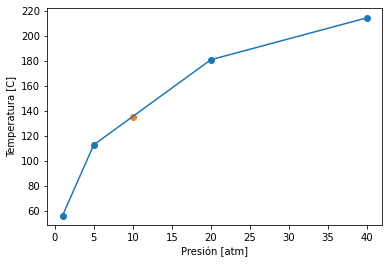

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

T = [56.5, 113, 181.0, 214.5]
P = [1, 5, 20, 40]

x = 10
y = 90.33 + 4.53*x

plt.plot(P,T)
plt.scatter(P,T)
plt.scatter(x,y)

plt.xlabel("Presión [atm]")
plt.ylabel("Temperatura [C]")
plt.show()

## Interpolación de Segundo orden


En la figura (\ref{fig::interpolacion_01}) se muestra una serie de puntos y en azul se muestra el punto de interés, observe que la gráfica muestra un conjunto de líneas rectas que unen los putnos, sin embargo, se observa claramente que la aproximación a través de líneas rectas es una aproximación muy burda. En esta sección se propone el uso de un polinomio de segundo orden para "suavizar" las líneas rectas.

Para la interpolación de segundo orden, se pretende utilizar un polinomio de cuadrático de la forma 

\begin{equation}
\hat y = a_0 + a_1x + a_2x^2
\end{equation}

Suponga que se quiere encontrar el mismo valor del ejemplo anterior, entonces de sustir los valores de los puntos $P_0$, $P_1$ y $P_2$ en la cuación anterior, para obtener un sistema de ecuaciones de 3 incógnitas con tres variables.

\begin{equation}
\begin{aligned}
56.5 & = a_0  + a_1(1)  + a_2(1)^2 \\
113 & = a_0 + a_1(5) + a_25(5)^2\\
181 & = a_0 + a_1(20) + a_2(20)^2
\end{aligned}
\end{equation}

cuya forma matricial está dada por 

\begin{equation}
\begin{bmatrix}
1 & 1 & 1\\
1 & 5 & 25 \\
1 & 20 & 400 \end{bmatrix}
\begin{bmatrix}  a_0 \\ a_1 \\ a_2 \end{bmatrix} = \begin{bmatrix} 56.5 \\ 113 \\ 181 \end{bmatrix}
\end{equation}

al resolver el sistema de ecuaciones se obteienen los siguientes valores


\begin{aligned}
a_0 & = 39.8509\\
a_1 & = 17.1539\\
a_2 & = -0.5048
\end{aligned}


Entonces el polinomio resutlante, debe generar una curva suave entre los tres puntos quese han elegido, dicho polinomio está dado por

\begin{equation}
\hat y = 39.8509 + 17.1539 x -0.5048x^2
\end{equation}


Entonces el valor que se buscaba era la temperatura cuando se tienen $10atm$, para encontrar el valor se debe de obtener el valor de la variable dependiente cuando $x = 10$ 

\begin{aligned}
\hat y & = 39.8509 + 17.1539 x -0.5048x^2\\
 & = 39.8509 + 1715.39 - 50.48\\
 & = 156.5899
\end{aligned}


En la siguiente figura, se muestra el efecto de hacer pasar un polinomio de sengudo orden a través de los primeros puntos, observe que la gráfica del polinomio de sengundo orden (línea punteada color nego) pasa por los puntos que se utilizaron para obtener el sistema de ecuaciones, se ha graficado también el enfoque lineal (círculo azul) y también se muestra el valor de la interpolación de segundo orden (cuadrado azul). Si se quisiera una curva que pasara por todos los puntos, se tendría que extender el procedimiento anterior utilizando un polinomio de tercer orden.



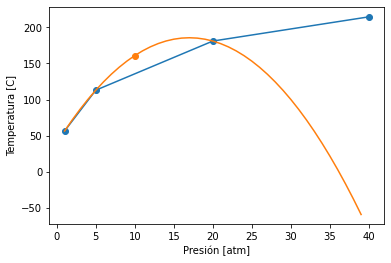

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

T = [56.5, 113, 181.0, 214.5]
P = [1, 5, 20, 40]

x_d = 10
y_d = 39.8509 + 17.1539*x -0.5048*(x**2)

x_pol = list(range(1,40,1))
y_pol = [39.8509 + 17.1539*x -0.5048*(x**2) for x in x_pol ]

plt.plot(P,T)
plt.scatter(P,T)
plt.plot(x_pol,y_pol)
plt.scatter(x_d,y_d)


plt.xlabel("Presión [atm]")
plt.ylabel("Temperatura [C]")
plt.show()

## Interpolación de Lagrange de primer orden

Para la interpolación de primer orden, al igual que en la sección aterior, se debe de proponer un polinomio de aproximación, en este caso en particular, se porpone el siguiente
\begin{equation}
\label{Lagrange_primer_orden}
P(x) = a_0(x - x_i) + a_1(x - x_0)
\end{equation}

donde $x$ es el valor de la variable independiente que se utiliza para la búsqueda y $x_0$ y $x_1$ son los valores de la variable independiente de los puntos conocidos (usualmente extraídos por tablas), consecuentemente, el intervalo que se deb3e de utilizar estaría dado por $\begin{bmatrix} x_0 & f(x_0) \end{bmatrix}$ y $\begin{bmatrix} x_1 & f(x_1) \end{bmatrix}$, además también hay dos incógnitas $a_0$ y $a_1$. Para encontrar el valor de las incógnitas se propone la siguiente metodología.

Se evalua el $P(x)$ en $x_0$, es decir, $P(x_0)$
\begin{equation}
\begin{aligned}
P(x_0) & = a_0(x_0 - x_1) + a_1(x_0 - x_0)\\
       & = a_0(x_0 - x_1)
\end{aligned}
\end{equation}

El valor de $a_0$ está dado por 
\begin{equation}
\label{a_0_1}
a_0 = \frac{P(x_0)}{x_0 - x_1} = \frac{f(x_0)}{x_0 - x_1}
\end{equation}

Se evalúa $P(x)$ en $x_1$, es decir, $P(x_1)$
\begin{equation}
\begin{aligned}
P(x_1) & = a_0(x_1 - x_1) + a_1(x_1 - x_0)\\
       & = a_1(x_1 - x_0)
\end{aligned}
\end{equation}

El valor de $a_1$ está dado por

\begin{equation}
\label{a_1_1}
a_1 = \frac{f(x_1)}{x_1 - x_0}
\end{equation}

Sustituyendo \eqref{a_0_1} y \eqref{a_1_1} en \eqref{Lagrange_primer_orden} se obtiene el siguiente polinomio 
\begin{equation}
\label{polinomial_lagrange_01}
\begin{aligned}
P(x) & = \frac{f(x_0)}{x_0 - x_1}(x - x_1) + \frac{f(x_1)}{x_1- x_0}(x - x_0)\\
     & = \frac{x - x_1}{x_0 - x_1}f(x_0) + \frac{x - x_0}{x_1 - x_0}f(x_1)\\ 
     & = L_0(x)f(x_0) + L_1(x)f(x_1)
\end{aligned}
\end{equation}

\subsection{Ejemplo}
Considerando la misma tabla que en el ejemplo anterior, el objetivo es encontrar la temperatura (variable dependiente) cuando la presión es $10 atm$

| Puntos | 0  |  1  |  2  |  3  |
|--------|----|-----|-----|-----|
| T\[c\] |56.5| 113 |181.0|214.5|
|P\[atm\]|  1 |  5  | 20  | 40  |

Observe que, conforme a la tabla que se muestra, $10 atm$ está el punto $P_1 = (5,113)$ and  $P_2 = (2,181)$, para poder aplicar las fórmulas anteriormente obtenidas, se eligen las variables como:
\begin{equation}
\begin{matrix}x_0 = 5 && x_1 = 20\\ f(x_0) = 113 &&f(x_1) = 181 \end{matrix}
\end{equation}

sustituyendo los valores en \eqref{polinomial_lagrange_01} se obtienen el siguiente polinomio
\begin{equation}
\begin{aligned}
P(x) & = \frac{113}{5 - 20}\Big(x-2\Big) + \frac{181}{20 - 5}\Big( x - 5  \Big)\\
 & = -7.533(x -20) + 12.066(x -5)\\
 & = 90.333 + 4.5333 x
\end{aligned}
\end{equation}

Para encontrar el valor de la temperatura se tiene que susituir $x = 10 $  en el polinomio anterior
\begin{equation}
\begin{aligned}
y &  = 90.333 + 4.5333x\\
& = 90.3333 + 4.5333\\
& = 135.6663
\end{aligned}
\end{equation}




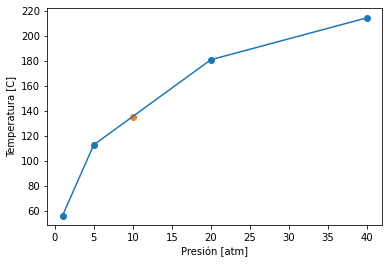

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

T = [56.5, 113, 181.0, 214.5]
P = [1, 5, 20, 40]

x = 10
y = 90.33 + 4.53*x

plt.plot(P,T)
plt.scatter(P,T)
plt.scatter(x,y)

plt.xlabel("Presión [atm]")
plt.ylabel("Temperatura [C]")
plt.show()

Para la interplación de segundo orden se propone un polinomio $P(x)$ de la sigiente forma 
\begin{equation}
P(x) = a_0(x-x_1)(x-x_2) + a_1(x-x_0)(x-x_2) + a_2(x-x_0)(x-x_1)
\label{eq_l2}
\end{equation}

Para encontrar los valores de las incógnitas $a_0, a_1$ y $a_3$ se deben de analizar los siguientes tres casos\\

**Caso I:** $x = x_0$
\begin{equation}
\begin{aligned}
P(x_0) & = a_0(x_0 - x_1)(x_0 - x_2) + a_1(x_0 - x_0)(x_0 -x_2) + a_2(x_0-x_0)(x_0 - x_1) \\
	   & = a_0(x_0 - x_1)(x_0 - x_2)
	   \end{aligned}
\end{equation}

\begin{equation}
\label{eq_a0l2}
a_0 = \frac{f(x_0}{(x_0 - x_1 )(x_0 - x_2)}
\end{equation}


**Caso II:** $x = x_1$}
\begin{equation}
\begin{aligned}
P(x_1) & = a_0(x_1 - x_1)(x_1 - x_2) + a_1(x_1 - x_0)(x_1 -x_2) + a_2(x_1-x_0)(x_1 - x_1) \\
& = a_1(x_1 - x_0)(x_1 - x_2)
\end{aligned}
\end{equation}


\begin{equation}
\label{eq_a1l2}
a_1 = \frac{f(x_1)}{(x_1 - x_0)(x_1 - x_2)}
\end{equation}


**Caso III:** $x = x_2$
\begin{equation}
\begin{aligned}
P(x_2) & = a_0(x_2 - x_1)(x_2 - x_2) + a_1(x_2 - x_0)(x_2 -x_2) + a_2(x_2-x_0)(x_2 - x_1) \\
& = a_2(x_1 - x_0)(x_1 - x_2)
\end{aligned}
\end{equation}

\begin{equation}
\label{eq_a2l2}
a_2 = \frac{f(x_2)}{(x_2-x_0)(x_2 - x_1)}
\end{equation}

Sustituyendo \eqref{eq_a0l2}-\eqref{eq_a2l2} en \eqref{eq_l2}
\begin{equation}
\begin{aligned}
P(x) & = \frac{f(x_0}{(x_0 - x_1 )(x_0 - x_2)}(x-x_1)(x-x_2) + \\ &  \frac{f(x_1)}{(x_1 - x_0)(x_1 - x_2)}(x-x_0)(x-x_2) + \\ &  \frac{f(x_2)}{(x_2-x_0)(x_2 - x_1)}(x-x_0)(x-x_1)
\end{aligned}
\label{eq_l2_final}
\end{equation}



Tomando el ejemploq ue se ha manejado en las secciones anteriores, se toman los puntos $P_0 = (1,56.5)$, $P_1 = (5,113)$ y $P_2=(20,181)$, haciendo los siguientes cambios de variables
\begin{equation}
\begin{matrix} x_0 = 1 & f(x_0) = 56.5 \\ x_1 = 5 & f(x_1) = 113 \\ x_2 = 20 & f(x_2) = 181\end{matrix}
\end{equation}

Calculando  $a_0$, $a_1$ y $a_2$
\begin{equation}
\begin{aligned}
a_0 & = \frac{f(x_0)}{(x_0 - x_1)(x_0 - x_2)} = \frac{56.5}{(1-5)(1-20)} = \frac{56.5}{(-4)(-19)} = \frac{56.5}{76}\\
& = 0.7434
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
a_1 & = \frac{f(x_1)}{(x_1-x_0)(x_1 - x_2)} = \frac{113}{(5-1)(5-20)} = \frac{113}{(4)(-15)} = \frac{113}{-60}\\
& = -1.8833
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
a_2 & = \frac{f(x_2)}{(x_2-x_0)(x_2 - x_1)} = \frac{181}{(20-1)(20-5)} = \frac{181}{(19)(15)} = \frac{181}{285}\\
& = 0.6350
\end{aligned}
\end{equation}

Sustituyendo todos los valores en \eqref{eq_l2_final}

\begin{equation}
P(x) = 0.7434\Big[(x-5)(x-20)\Big] - 1.8833\Big[(x-1)(x-20)\Big] + 0.6350\Big[(x-1)(x-5)\Big]
\end{equation}

El problema inicial pide calcular $P(10)$, 

\begin{equation}
\begin{aligned}
P(10) & = 0.7434\Big[(10-5)(10-20)\Big] - 1.8833\Big[(10-1)(10-20)\Big] + 0.6350\Big[(10-1)(10-5)\Big]\\
      & = 160.9020
\end{aligned}
\end{equation}

160.90200000000002


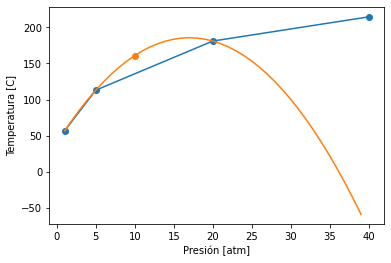

In [34]:
import matplotlib.pyplot as plt

%matplotlib inline

T = [56.5, 113, 181.0, 214.5]
P = [1, 5, 20, 40]

x_d = 10
y_d =  0.7434*(x_d-5)*(x_d-20) - 1.8833*(x_d-1)*(x_d-20) + 0.6350*(x_d-1)*(x_d-5)

x_pol = list(range(1,40,1))
y_pol = [(0.7434*(x-5)*(x-20) - 1.8833*(x-1)*(x-20) + 0.6350*(x-1)*(x-5)) for x in x_pol ]

print(y_d)

plt.plot(P,T)
plt.scatter(P,T)
plt.plot(x_pol,y_pol)
plt.scatter(x_d,y_d)


plt.xlabel("Presión [atm]")
plt.ylabel("Temperatura [C]")
plt.show()

## Generalización de interpolación por polinomio de Lagrange


Suponga ahora que tiene $n$ puntos y que quiere obtener la ecuación del polinomio de Lagrange, de forma general las ecuaciones que tendría que utilizar son las siguientes


\begin{equation}
	f_n(x) = \sum_{i=0}^n{L_i(x)f(x_i)}
\end{equation}

donde

\begin{equation}
	L_i(x) = \sum_{j=0, j\neq i}^ n \Bigg(\frac{x - x_j}{x_i - x_j}\Bigg)
\end{equation}

## Desarrollo de código para interpolación de Polinomio de Lagrange - Código 01

In [32]:


import numpy as np 
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

import matplotlib.pyplot as plt

%matplotlib inline

T = [56.5, 113, 181.0, 214.5]
P = [1, 5, 20, 40]


x = [1,5,20,40]
y = [56.5,113,181.0,214]
xint = 10

n = len(x)
L = np.zeros(n)

for i in range(0,n):
	L[i] = 1.0
	for j in range(0,n):
		if i != j:
			L[i] = L[i] * (xint - x[j])/(x[i] - x[j])

yint = np.sum(L*y)
print(yint)


156.03354540196648


## Desarrollo de código para interpolación de Polinomio de Lagrange - Código 01


In [38]:
import numpy as np 


def InterLagrange(x,y,xint):
	n = len(x)
	L = np.zeros(n)

	for i in range(0,n):
		L[i] = 1.0
		for j in range(0,n):
			if i != j:
				L[i] = L[i] * (xint - x[j])/(x[i] - x[j])

	yint = np.sum(L*y)
	return yint

x = [1,5,20,40]
y = [56.5,113,181.0,214]
xint = 10


yint = InterLagrange(x, y,xint)
print('A una presión de {:.2f} atm, se necesita una temperatura de {:.2f} ^oC '.format(xint, yint))

A una presión de 10.00 atm, se necesita una temperatura de 156.03 ^oC 
